Импортируем необходимые библиотеки

In [1]:
import warnings
warnings.filterwarnings('ignore')
import altair as alt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from scipy import stats
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

Загризим датасет и посмотрим на признаки

In [3]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.duplicated().sum()

1256

In [7]:
df = df.drop_duplicates()

In [8]:
df.duplicated().sum()

0

In [9]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                53
Insulin                     182
BMI                         247
DiabetesPedigreeFunction    505
Age                          52
Outcome                       2
dtype: int64

In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000
mean,3.752688,120.892473,68.959677,20.908602,79.534946,32.229704,0.472355,33.142473,0.340054
std,3.335541,31.943115,19.317521,16.311726,111.745897,8.206319,0.326181,11.751286,0.474046
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.400000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,36.000000,32.300000,0.375500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,130.000000,36.800000,0.632500,40.250000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


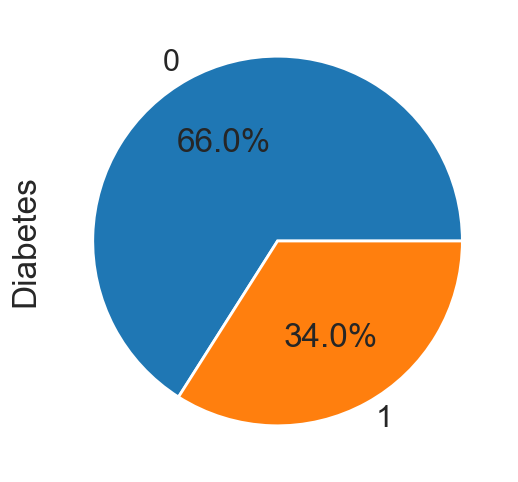

In [11]:
sns.set_style('darkgrid')
sns.set_context('poster')
plt.rcParams['figure.figsize'] = [8,6]
df.groupby('Outcome').size().plot(kind='pie',
                                       y = "Outcome",
                                       label = "Diabetes",
                                       autopct='%1.1f%%');

Наблюдаем ситуацию сильного дисбаланса классов в данных. С долей 66.0% участников, не болеющих диабетом (класс "0"), и 34.0% участников, у которых есть диабет. (класс "1"), ясно, что данный набор данных имеет низкое представительство одного из классов по сравнению с другим.

In [12]:
sel = alt.selection_single(fields=["Outcome"])
c1= alt.Chart(df).mark_circle().encode(
    x="Age",
    y="BloodPressure",
    color=alt.Color('Outcome')
)
c2= alt.Chart(df).mark_circle().encode(
    x="Pregnancies",
    y="Insulin",
    color=alt.Color('Outcome')
)
c1&c2

alt.VConcatChart(...)

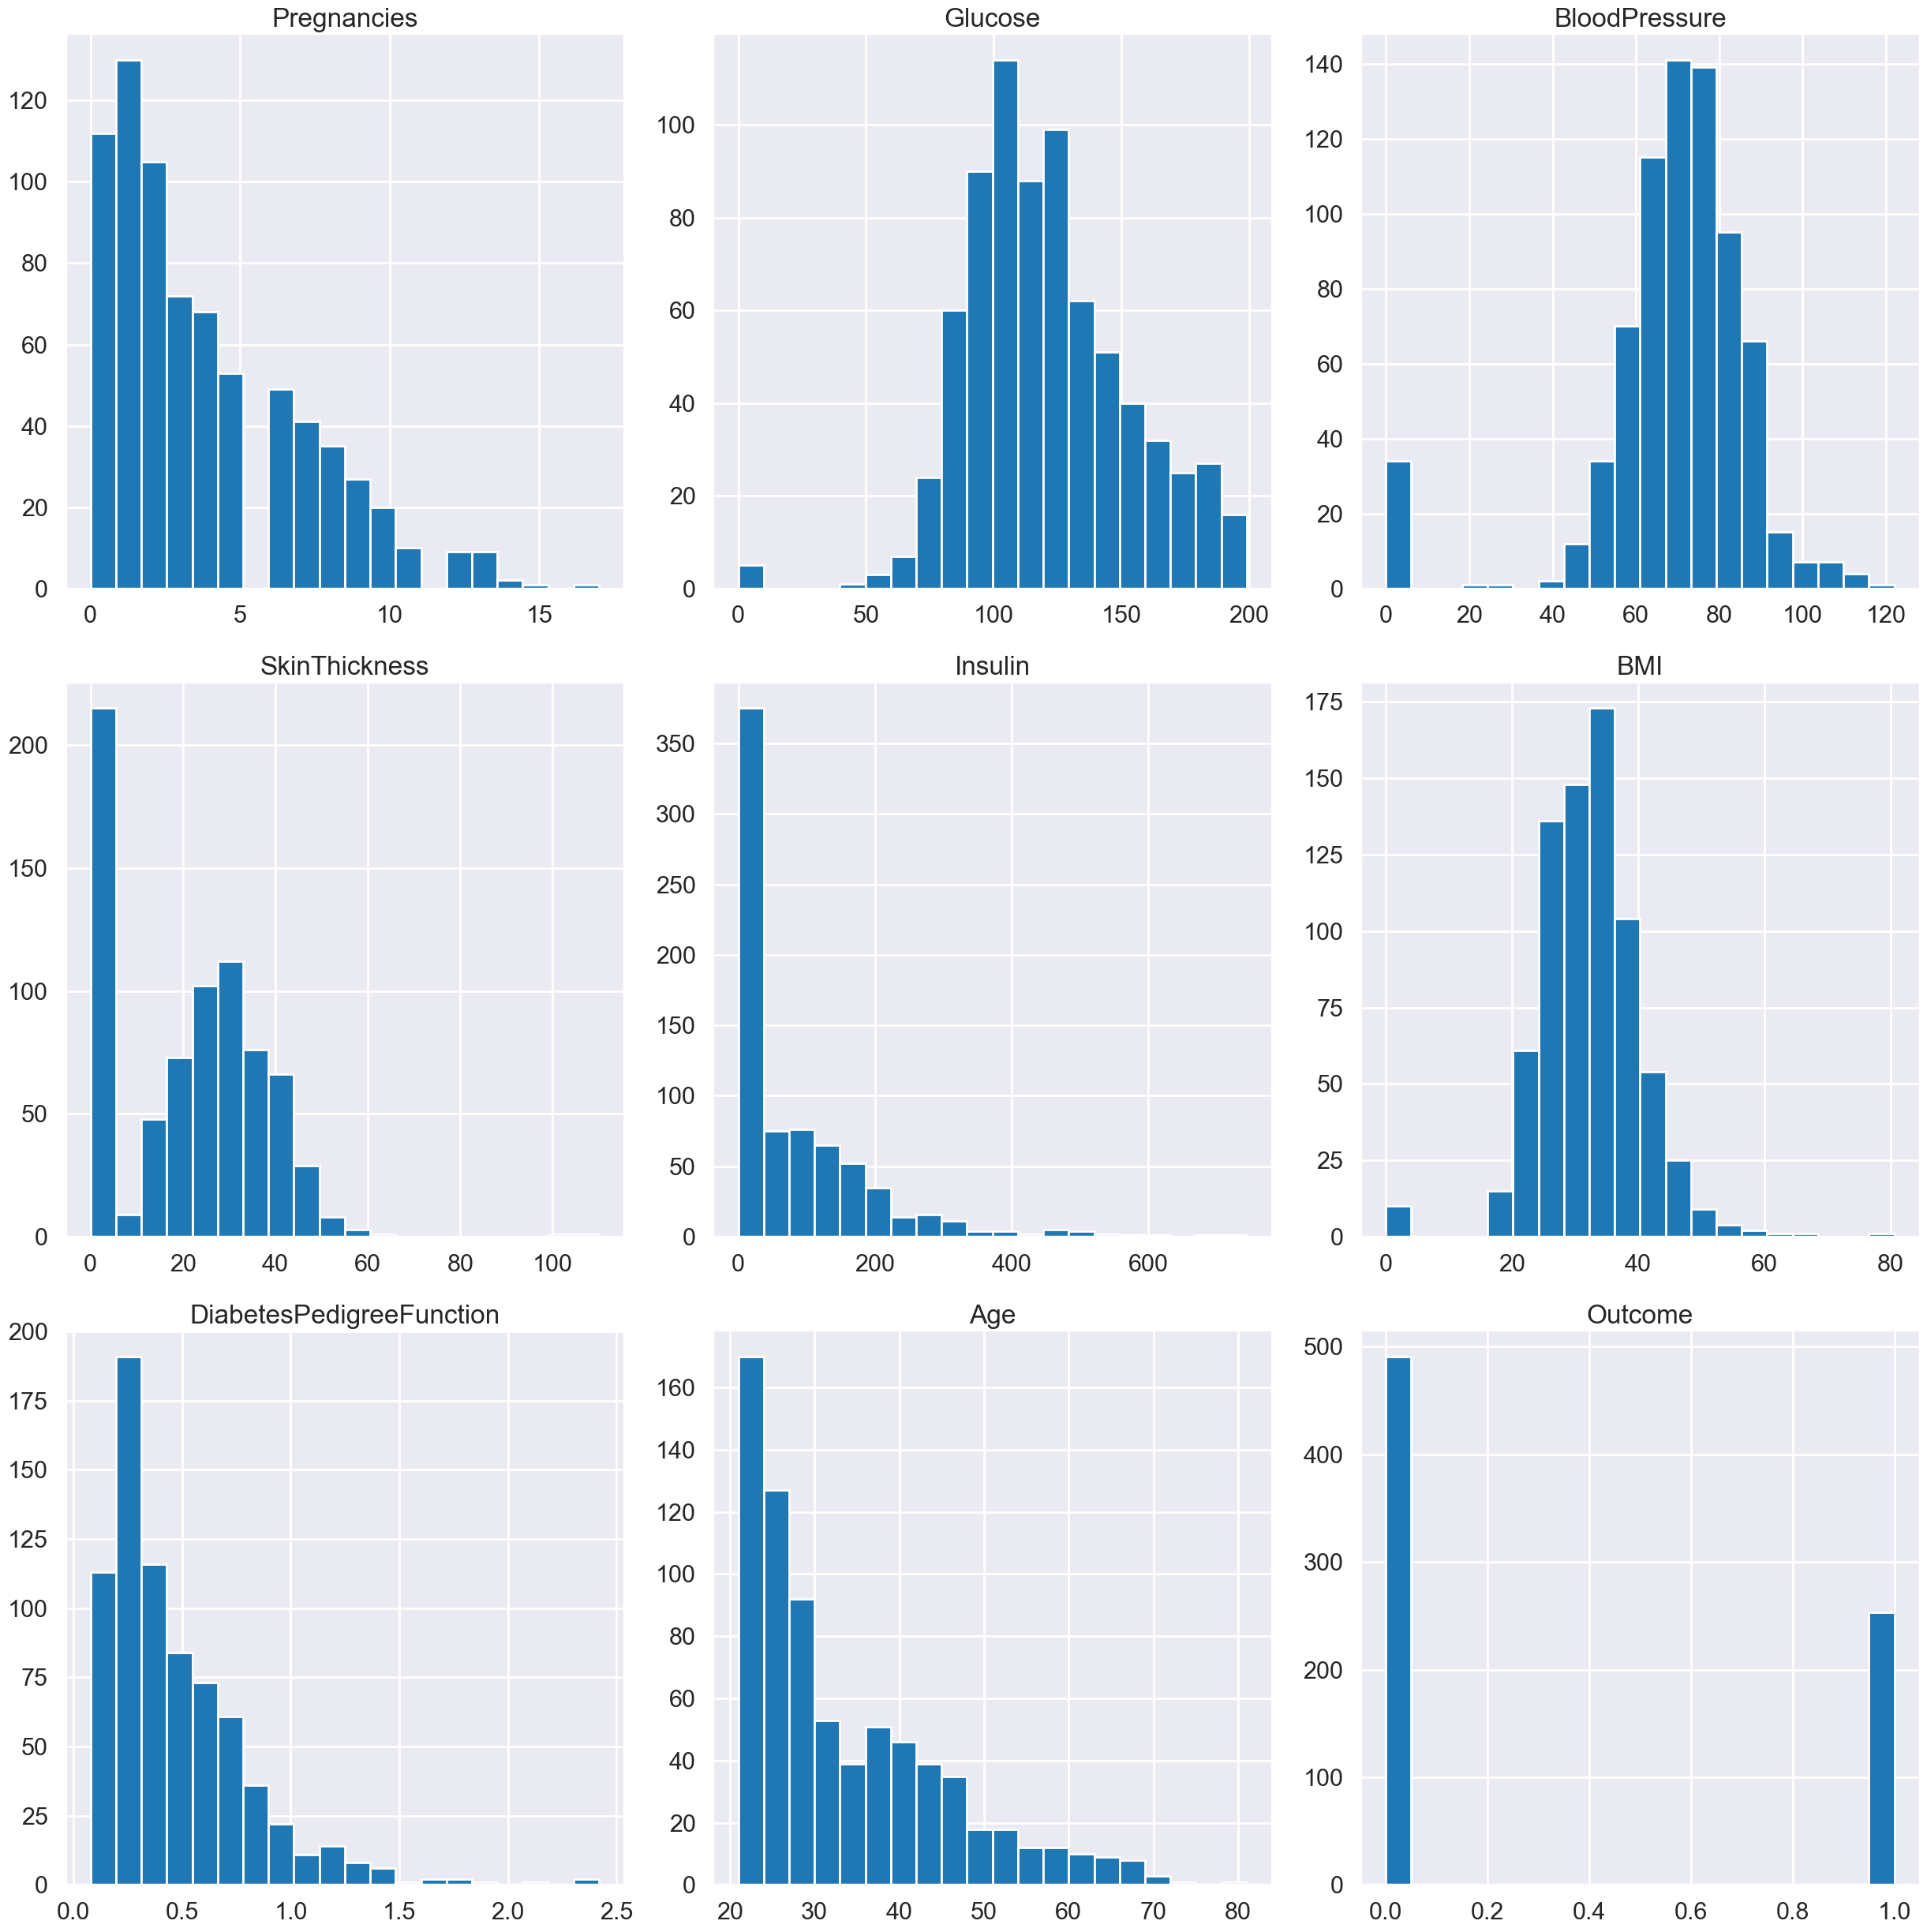

In [13]:
# Генерирует гистограммы для всех числовых столбцов в DataFrame
df.hist(figsize=(25, 25), bins=20)
plt.tight_layout() # Улучшает размещение подграфиков чтобы они не пересекались
plt.show();

In [14]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.117050,0.144284,-0.062530,-0.055783,0.025621,-0.024800,0.536657,0.220942
Glucose,0.117050,1.000000,0.137616,0.070855,0.325135,0.239693,0.133669,0.248673,0.453939
BloodPressure,0.144284,0.137616,1.000000,0.189010,0.091822,0.272704,0.051479,0.242559,0.078808
SkinThickness,-0.062530,0.070855,0.189010,1.000000,0.436080,0.367853,0.184098,-0.103400,0.075562
Insulin,-0.055783,0.325135,0.091822,0.436080,1.000000,0.205365,0.202825,-0.063747,0.114655
BMI,0.025621,0.239693,0.272704,0.367853,0.205365,1.000000,0.124132,0.053336,0.278123
DiabetesPedigreeFunction,-0.024800,0.133669,0.051479,0.184098,0.202825,0.124132,1.000000,0.033321,0.174688
Age,0.536657,0.248673,0.242559,-0.103400,-0.063747,0.053336,0.033321,1.000000,0.242077
Outcome,0.220942,0.453939,0.078808,0.075562,0.114655,0.278123,0.174688,0.242077,1.000000


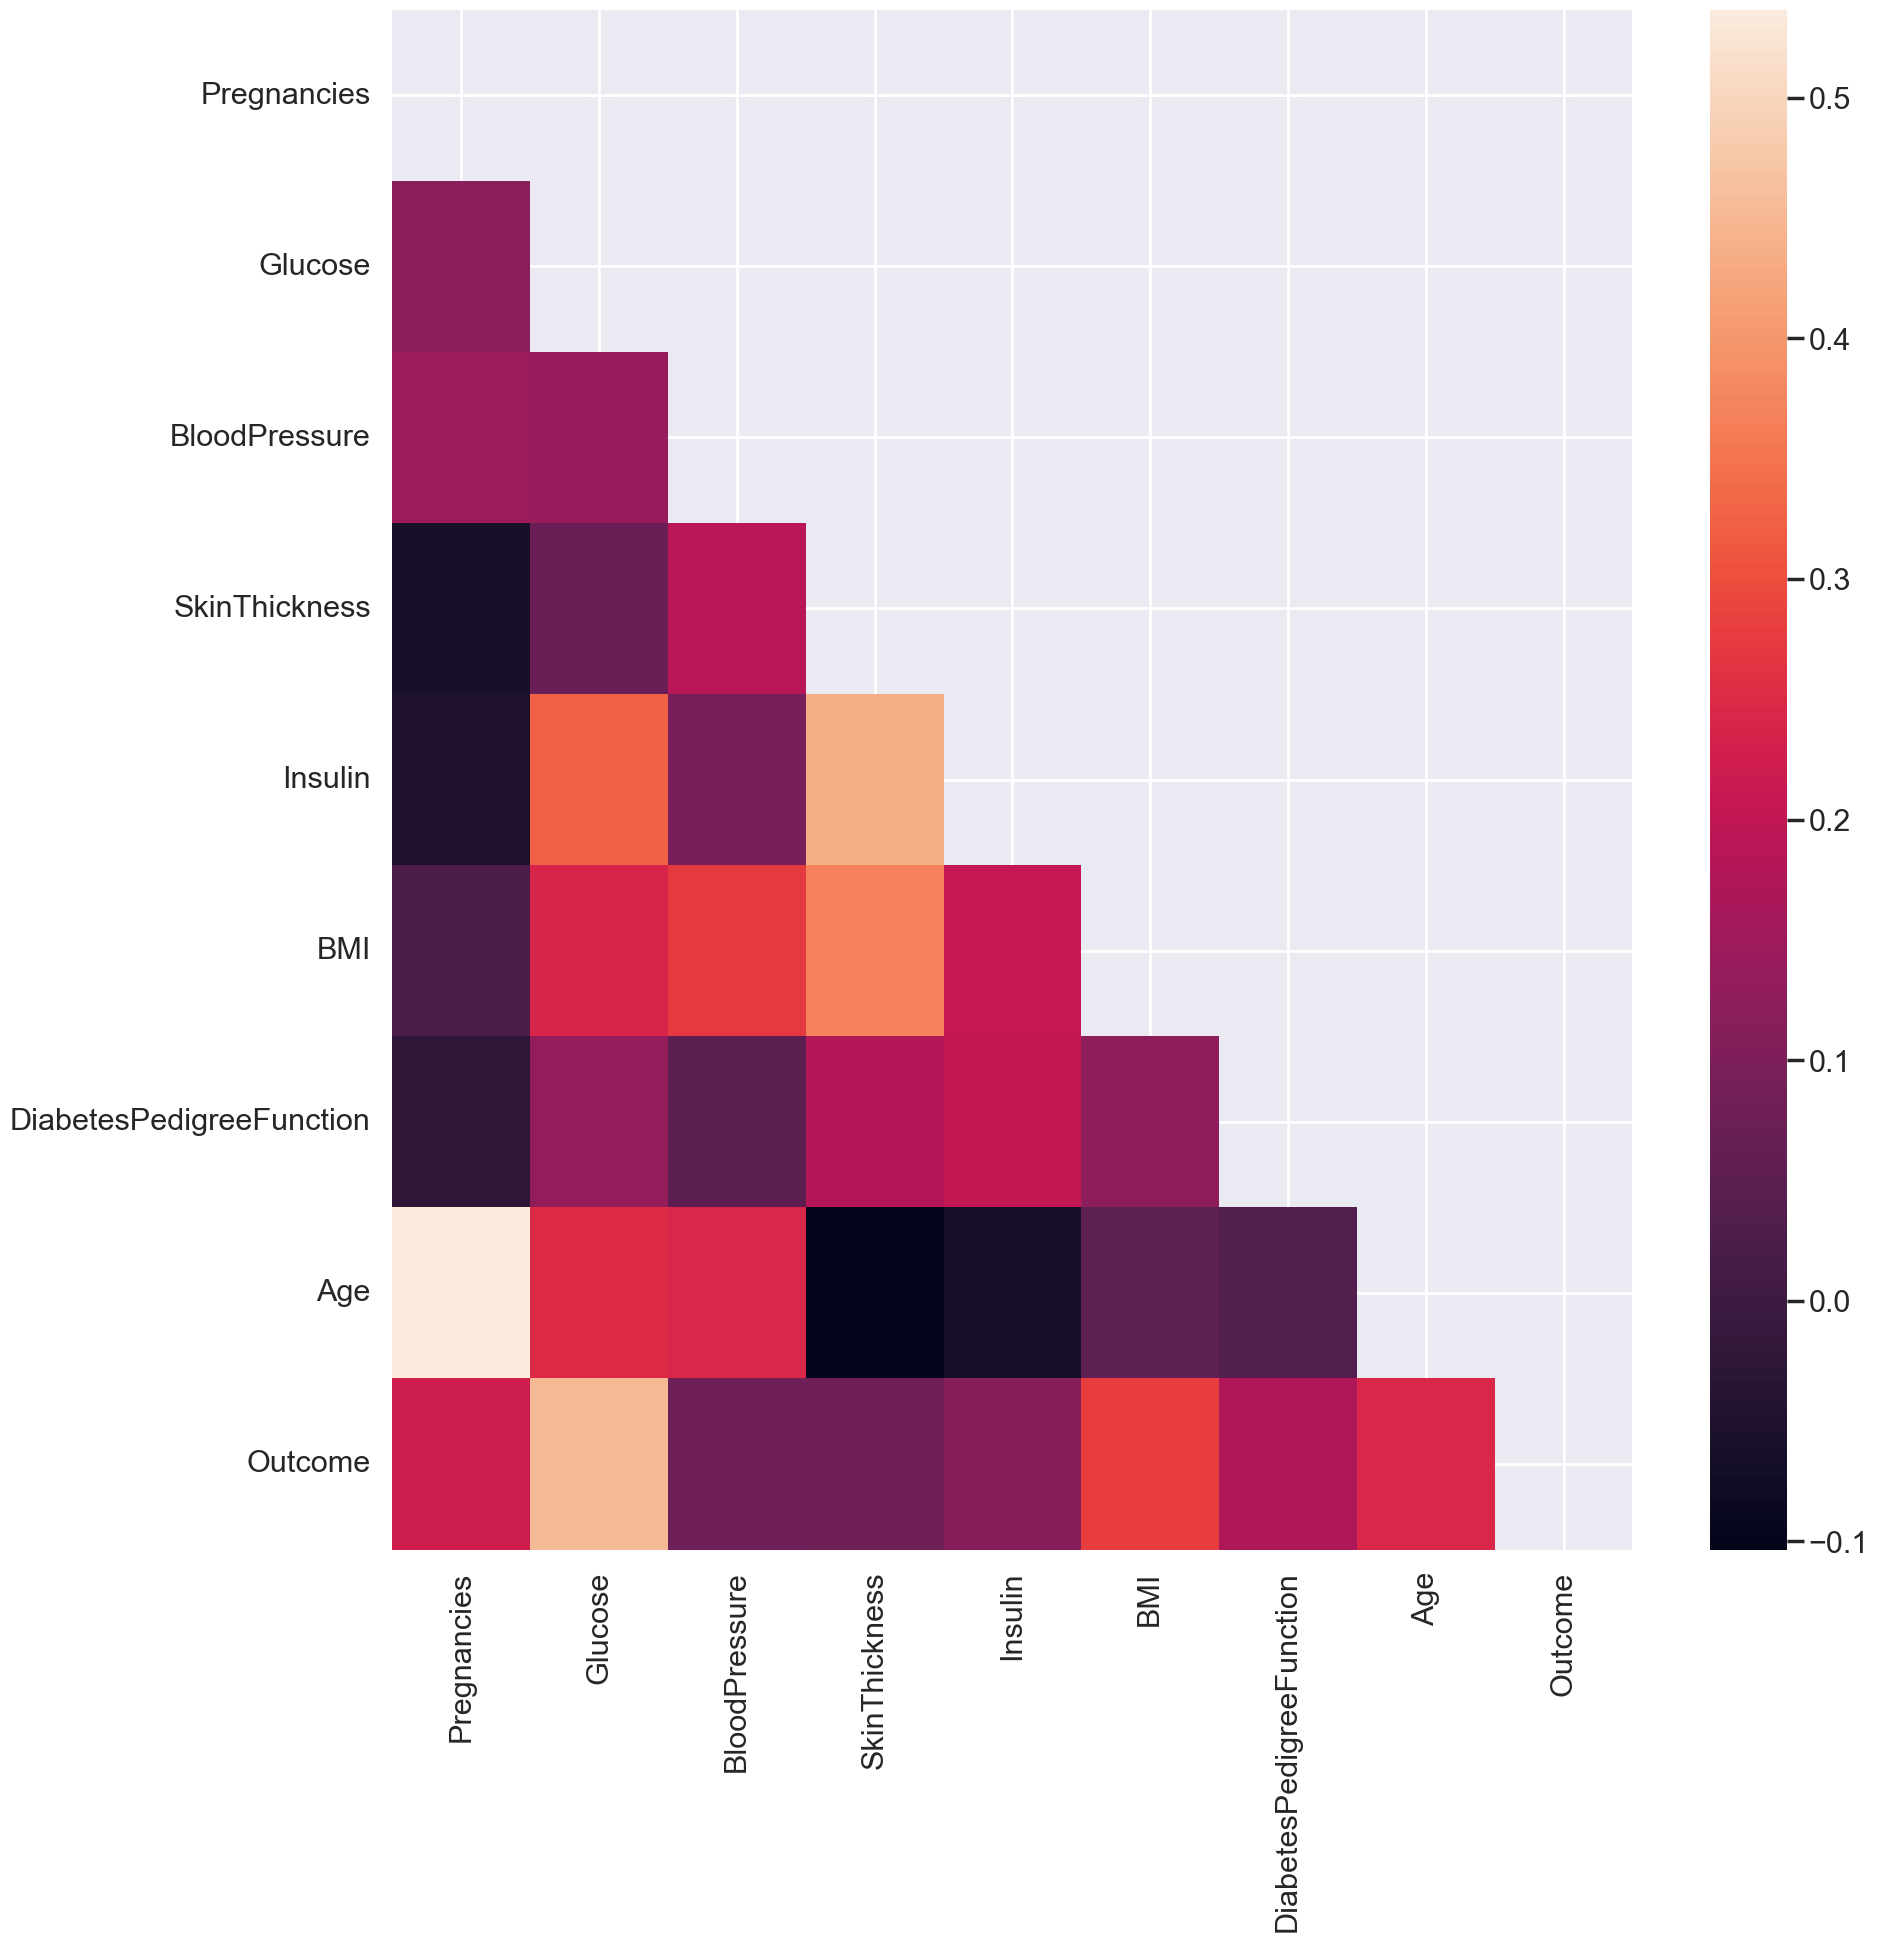

In [15]:
plt.subplots(figsize=(20, 20))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), mask=mask, annot = True, fmt = ".2f")
plt.show();

In [16]:
# Предварительная обработка данных
scaler = StandardScaler()
X = df.drop('Outcome', axis=1)
X_scaled = scaler.fit_transform(X)
y = df['Outcome']

# Создание и обучение модели логистической регрессии
lg = LogisticRegression()
lg.fit(X_scaled, y)

# После обучения модели можно получить коэффициенты\
lg.coef_

array([[ 0.39033173,  1.06022065, -0.16232043,  0.01420798, -0.15561469,
         0.59481098,  0.33788618,  0.18303546]])

In [17]:
feature_names = X.columns
coefficients = lg.coef_[0]  # lg.coef_ возвращает массив в массиве, если модель обучена на двухмерном X

# Связывание имен признаков с их коэффициентами
feature_importances = zip(feature_names, coefficients)

# Преобразование в список для более удобного отображения
feature_importance_list = list(feature_importances)

# Отображение признаков и их коэффициентов
for feature, coef in feature_importance_list:
    print(f"{feature}: {coef}")

Pregnancies: 0.3903317301019206
Glucose: 1.0602206521109765
BloodPressure: -0.16232043476501234
SkinThickness: 0.014207979237488927
Insulin: -0.1556146859086369
BMI: 0.5948109753363975
DiabetesPedigreeFunction: 0.3378861785915119
Age: 0.18303545884884417


In [18]:
from sklearn.metrics import accuracy_score

In [19]:
X = df[['Age', 'DiabetesPedigreeFunction']]  # Выбираем признаки
y = df['Outcome']  # Целевая переменная

X_train, X_test1, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
model1 = LogisticRegression(class_weight='balanced')
model1.fit(X_train, y_train)

predictions1 = model1.predict(X_test1)
accuracy1 = accuracy_score(y_test, predictions1)
print("Accuracy:", accuracy1)

Accuracy: 0.6912751677852349


In [21]:
X = df[['Age', 'DiabetesPedigreeFunction', 'SkinThickness']]  # Выбираем признаки
y = df['Outcome']  # Целевая переменная

X_train, X_test2, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
model2 = LogisticRegression(class_weight='balanced')
model2.fit(X_train, y_train)

predictions2 = model2.predict(X_test2)
accuracy2 = accuracy_score(y_test, predictions2)
print("Accuracy:", accuracy2)

Accuracy: 0.697986577181208


In [23]:
X = df[['Age', 'DiabetesPedigreeFunction', 'SkinThickness', 'Glucose']]  # Выбираем признаки
y = df['Outcome']  # Целевая переменная

X_train, X_test3, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
model3 = LogisticRegression(class_weight='balanced')
model3.fit(X_train, y_train)

predictions3 = model3.predict(X_test3)
accuracy3 = accuracy_score(y_test, predictions3)
print("Accuracy:", accuracy3)

Accuracy: 0.7651006711409396


In [25]:
X_scaled  # Выбираем признаки
y = df['Outcome']  # Целевая переменная

X_train, X_test4, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [26]:
model4 = LogisticRegression(class_weight='balanced')
model4.fit(X_train, y_train)

predictions4 = model4.predict(X_test4)
accuracy4 = accuracy_score(y_test, predictions4)
print("Accuracy:", accuracy4)

Accuracy: 0.7315436241610739


In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
models = {
    'Model 1': model1,
    'Model 2': model2,
    'Model 3': model3,
    'Model 4': model4
}

test_datasets = {
    'Model 1': X_test1,
    'Model 2': X_test2,
    'Model 3': X_test3,
    'Model 4': X_test4
}

results = []

for model_name, model in models.items():
    X_test = test_datasets[model_name]
    y_pred = model.predict(X_test)
    scores = [
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred, average='binary'),
        recall_score(y_test, y_pred, average='binary'),
        f1_score(y_test, y_pred, average='binary')
    ]
    results.append(scores)

# Создаем DataFrame для результатов
results_df = pd.DataFrame(results, columns=['Accuracy', 'Precision', 'Recall', 'F1'], index=models.keys())

In [28]:
results_df

,Accuracy,Precision,Recall,F1
Model 1,0.691275,0.500000,0.717391,0.589286
Model 2,0.697987,0.508475,0.652174,0.571429
Model 3,0.765101,0.590164,0.782609,0.672897
Model 4,0.731544,0.550000,0.717391,0.622642


По результатам видно, что модель 3 идеально отрабатывает. Все метрики имеют достаточно хорошие значения. В данной модели, в отличие от других моделей, были учтены почти все признаки из датасета, имеющие огромное воздействие на появление диабета у человека. В нашем случае упор был сделан на метрику recall(значение равно 0.78)

In [29]:
print(X_scaled)

[[-0.52581192  0.53592255 -0.36052035 ...  0.16709288 -1.05949657
   1.18002819]
 [-1.12581817 -1.15571984  0.67550568 ...  0.72801358 -0.73430455
  -0.86367534]
 [-1.12581817  0.75520952 -3.57220105 ...  1.45964929  0.48363158
  -0.18244083]
 ...
 [ 0.67420056  0.56724926  0.77910829 ...  2.25225464 -0.46740167
   1.43549114]
 [-0.52581192  1.44439716 -1.29294378 ...  2.49613321 -0.06244558
  -0.43790377]
 [-0.2258088   1.28776361 -3.57220105 ...  2.00837607  0.14616817
  -0.77852103]]
